In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

result_path = "Results"
unWanted_columns = ["CompanyId", "PersianYear", "Return", "Beta", "r_dicho", "b_dicho"] 

def disp(name, value):
    print(f"==> {name}:")
    display(value)

df = pd.read_csv("Data/Main_Data_new_R2B2.csv")
disp("df", df)

==> df:


,CompanyId,PersianYear,Return,Beta,Debt_to_total_assets_ratio,Operating_profit_to_sale,Fixed_asset_turnover,Return_from_market,Current_assets_ratio,Working_capital_return,...,Sales_growth_rate,Current_debt_to_total_debt_Ratio,Cost_to_sales_ratio,Sale_to_current_assets,Operating_cash_flow_to_sales,Cash_flow_returns_to_sales,Profit_margin_before_interest_and_taxes,Net_return_on_working_capital,r_dicho,b_dicho
0,1,1390,50.833333,-0.260216,0.71,37246.0,9.62,11.207174,0.51,-27.47,...,30.27,89.55,2.55,5.64,3.95,16.32,13.42,-287.64,1,-1
1,2,1390,27.222982,1.117635,0.00,36866.0,0.83,11.207174,0.47,568.96,...,32.20,90.81,6.64,1.00,46.62,3.88,80.36,568.96,-1,-1
2,3,1390,-4.792332,1.301284,0.31,6002043.0,1.49,11.207174,0.54,108.73,...,19.48,77.61,0.60,1.33,62.08,45.77,62.53,108.73,-1,-1
3,4,1390,35.099338,1.562189,0.58,6231235.0,1.30,11.207174,0.59,243.08,...,18.42,94.45,4.11,1.42,63.29,47.45,71.82,222.61,1,-1
4,6,1390,167.045455,0.899287,0.00,41625.0,6.85,11.207174,0.96,32.00,...,50.19,72.65,14.90,0.96,30.24,2.57,24.87,32.07,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,563,1399,45.948012,0.595273,0.00,3206149.0,6.13,154.963117,0.87,97.56,...,53.93,95.57,3.27,0.91,22.46,-0.46,55.48,97.56,1,1
998,589,1399,131.628805,0.354833,0.54,480750.0,41.32,154.963117,0.91,108.72,...,161.78,100.00,0.30,3.51,3.05,9.46,12.64,108.72,1,1
999,592,1399,229.394260,1.088048,0.65,60820142.0,2.93,154.963117,0.88,140.46,...,83.56,91.92,23.74,2.33,1.68,23.09,40.43,162.35,1,-1
1000,598,1399,174.858782,0.907423,0.36,14892350.0,0.60,154.963117,0.54,276.70,...,71.05,97.02,6.44,1.19,14.70,22.81,52.50,276.70,1,1


In [2]:
### Label ratios
print("Data len:", len(df))
# print("r_dicho(+1):", len(df[df["r_dicho"]==1])/len(df)*100)
# print("r_dicho(-1):",len(df[df["r_dicho"]==-1])/len(df)*100)
# print("b_dicho(+1):", len(df[df["b_dicho"]==1])/len(df)*100)
# print("b_dicho(-1):",len(df[df["b_dicho"]==-1])/len(df)*100)

comapnies = df["CompanyId"].unique()
print("Number of Companies:", len(comapnies))

# n_dataPoint = {x:0 for x in range(1,11)}
# for company in comapnies:
#     n_dataPoint[len(df[df["CompanyId"]==company])] += 1
    
# for key, value in n_dataPoint.items():
#     print(f"Companies with {key} data-point: {value}")

Data len: 1002
Number of Companies: 143


In [3]:
DataSets_path = f"{result_path}/DataSets"
if not os.path.exists(DataSets_path):
    os.makedirs(DataSets_path)

Features_path = f"{result_path}/Features"
if not os.path.exists(Features_path):
    os.makedirs(Features_path)

### Original scaling Data
df_X = df.drop(unWanted_columns, axis=1)

df.to_csv(f"{DataSets_path}/df.csv", index=False)
df_X.to_csv(f"{Features_path}/df_X.csv", index=False)
disp("df_X", df_X)

### Standard scaling Data
standar_scaler = preprocessing.StandardScaler()
S_df_X = standar_scaler.fit_transform(df_X)
S_df_X = pd.DataFrame(S_df_X, columns=df_X.columns)

S_df = df.copy()
S_df[S_df_X.columns] = S_df_X[S_df_X.columns]

S_df.to_csv(f"{DataSets_path}/S_df.csv", index=False)
S_df_X.to_csv(f"{Features_path}/S_df_X.csv", index=False)
disp("S_df_X", S_df_X)

### SN scaling Data
SN_df_X = preprocessing.normalize(S_df_X)
SN_df_X = pd.DataFrame(SN_df_X, columns=df_X.columns)

SN_df = df.copy()
SN_df[SN_df_X.columns] = SN_df_X[SN_df_X.columns]

SN_df.to_csv(f"{DataSets_path}/SN_df.csv", index=False)
SN_df_X.to_csv(f"{Features_path}/SN_df_X.csv", index=False)
disp("SN_df_X", SN_df_X)

==> df_X:


,Debt_to_total_assets_ratio,Operating_profit_to_sale,Fixed_asset_turnover,Return_from_market,Current_assets_ratio,Working_capital_return,Longterm_debt_to_equity_ratio,Return_ratio_without_risk,Profit_margin_growth_rate,Stock_market_value,...,Operating_profit_margin,Net_profit_margin,Sales_growth_rate,Current_debt_to_total_debt_Ratio,Cost_to_sales_ratio,Sale_to_current_assets,Operating_cash_flow_to_sales,Cash_flow_returns_to_sales,Profit_margin_before_interest_and_taxes,Net_return_on_working_capital
0,0.71,37246.0,9.62,11.207174,0.51,-27.47,3.00,20,0.00,2.050000e+11,...,11.78,11.95,30.27,89.55,2.55,5.64,3.95,16.32,13.42,-287.64
1,0.00,36866.0,0.83,11.207174,0.47,568.96,1.49,20,0.94,3.140000e+11,...,28.64,72.87,32.20,90.81,6.64,1.00,46.62,3.88,80.36,568.96
2,0.31,6002043.0,1.49,11.207174,0.54,108.73,0.57,20,0.11,3.520000e+13,...,62.10,62.44,19.48,77.61,0.60,1.33,62.08,45.77,62.53,108.73
3,0.58,6231235.0,1.30,11.207174,0.59,243.08,1.75,20,0.17,3.950000e+13,...,65.73,65.28,18.42,94.45,4.11,1.42,63.29,47.45,71.82,222.61
4,0.00,41625.0,6.85,11.207174,0.96,32.00,0.32,20,0.37,7.180000e+11,...,24.87,24.87,50.19,72.65,14.90,0.96,30.24,2.57,24.87,32.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,0.00,3206149.0,6.13,154.963117,0.87,97.56,1.56,20,0.29,2.860000e+13,...,54.14,42.03,53.93,95.57,3.27,0.91,22.46,-0.46,55.48,97.56
998,0.54,480750.0,41.32,154.963117,0.91,108.72,1.16,20,1.52,6.860000e+12,...,10.93,9.66,161.78,100.00,0.30,3.51,3.05,9.46,12.64,108.72
999,0.65,60820142.0,2.93,154.963117,0.88,140.46,2.02,20,-0.24,5.460000e+14,...,40.26,40.43,83.56,91.92,23.74,2.33,1.68,23.09,40.43,162.35
1000,0.36,14892350.0,0.60,154.963117,0.54,276.70,0.58,20,0.10,1.400000e+14,...,62.01,51.77,71.05,97.02,6.44,1.19,14.70,22.81,52.50,276.70


==> S_df_X:


,Debt_to_total_assets_ratio,Operating_profit_to_sale,Fixed_asset_turnover,Return_from_market,Current_assets_ratio,Working_capital_return,Longterm_debt_to_equity_ratio,Return_ratio_without_risk,Profit_margin_growth_rate,Stock_market_value,...,Operating_profit_margin,Net_profit_margin,Sales_growth_rate,Current_debt_to_total_debt_Ratio,Cost_to_sales_ratio,Sale_to_current_assets,Operating_cash_flow_to_sales,Cash_flow_returns_to_sales,Profit_margin_before_interest_and_taxes,Net_return_on_working_capital
0,1.446982,-0.177738,1.368635,-0.823538,-1.142679,-0.097945,0.013158,0.38503,-0.034208,-0.175816,...,-0.761736,-0.342678,-0.091098,0.051317,-0.830177,3.467391,-0.570462,-0.020554,-0.512166,0.023144
1,-0.889458,-0.177763,-0.556431,-0.823538,-1.371730,-0.000108,-0.208092,0.38503,-0.030569,-0.174930,...,0.252521,1.501157,-0.049946,0.164013,-0.038430,-0.504666,0.416844,-0.664230,1.467430,0.038784
2,0.130678,0.215557,-0.411887,-0.823538,-0.970892,-0.075603,-0.342894,0.38503,-0.033782,0.108763,...,2.265392,1.185477,-0.321164,-1.016618,-1.207660,-0.222171,0.774560,1.503261,0.940149,0.030381
3,1.019183,0.230669,-0.453498,-0.823538,-0.684579,-0.053564,-0.169996,0.38503,-0.033550,0.143731,...,2.483764,1.271434,-0.343766,0.489581,-0.528190,-0.145126,0.802557,1.590188,1.214879,0.032460
4,-0.889458,-0.177449,0.761987,-0.823538,1.434135,-0.088189,-0.379525,0.38503,-0.032776,-0.171645,...,0.025727,0.048365,0.333640,-1.460249,1.560549,-0.538908,0.037840,-0.732013,-0.173559,0.028981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,-0.889458,0.031207,0.604303,1.262043,0.918773,-0.077435,-0.197836,0.38503,-0.033085,0.055092,...,1.786538,0.567738,0.413385,0.589756,-0.690798,-0.581710,-0.142175,-0.888792,0.731661,0.030177
998,0.887553,-0.148495,8.311138,1.262043,1.147823,-0.075604,-0.256445,0.38503,-0.028323,-0.121698,...,-0.812870,-0.411988,2.712983,0.985983,-1.265734,1.644011,-0.591287,-0.375507,-0.535233,0.030381
999,1.249537,3.830046,-0.096518,1.262043,0.976035,-0.070398,-0.130435,0.38503,-0.035137,4.262590,...,0.951551,0.519312,1.045161,0.263294,3.271805,0.633876,-0.622986,0.329742,0.286592,0.031360
1000,0.295216,0.801749,-0.606803,1.262043,-0.970892,-0.048049,-0.341429,0.38503,-0.033821,0.960997,...,2.259978,0.862534,0.778421,0.719447,-0.077146,-0.342017,-0.321727,0.315255,0.643535,0.033448


==> SN_df_X:


,Debt_to_total_assets_ratio,Operating_profit_to_sale,Fixed_asset_turnover,Return_from_market,Current_assets_ratio,Working_capital_return,Longterm_debt_to_equity_ratio,Return_ratio_without_risk,Profit_margin_growth_rate,Stock_market_value,...,Operating_profit_margin,Net_profit_margin,Sales_growth_rate,Current_debt_to_total_debt_Ratio,Cost_to_sales_ratio,Sale_to_current_assets,Operating_cash_flow_to_sales,Cash_flow_returns_to_sales,Profit_margin_before_interest_and_taxes,Net_return_on_working_capital
0,0.289228,-0.035527,0.273567,-0.164612,-0.228403,-0.019577,0.002630,0.076961,-0.006838,-0.035143,...,-0.152258,-0.068496,-0.018209,0.010257,-0.165939,0.693074,-0.114026,-0.004108,-0.102373,0.004626
1,-0.227132,-0.045394,-0.142091,-0.210299,-0.350286,-0.000028,-0.053139,0.098322,-0.007806,-0.044670,...,0.064484,0.383336,-0.012754,0.041882,-0.009814,-0.128872,0.106445,-0.169618,0.374724,0.009904
2,0.023896,0.039417,-0.075318,-0.150594,-0.177539,-0.013825,-0.062702,0.070407,-0.006177,0.019889,...,0.414254,0.216779,-0.058729,-0.185901,-0.220835,-0.040627,0.141637,0.274889,0.171917,0.005556
3,0.186821,0.042283,-0.083128,-0.150958,-0.125486,-0.009819,-0.031161,0.070578,-0.006150,0.026346,...,0.455284,0.233059,-0.063014,0.089742,-0.096819,-0.026602,0.147112,0.291488,0.222692,0.005950
4,-0.164180,-0.032754,0.140651,-0.152012,0.264719,-0.016278,-0.070054,0.071071,-0.006050,-0.031683,...,0.004749,0.008928,0.061585,-0.269540,0.288053,-0.099474,0.006985,-0.135118,-0.032036,0.005350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,-0.199830,0.007011,0.135766,0.283537,0.206416,-0.017397,-0.044447,0.086503,-0.007433,0.012377,...,0.401373,0.127551,0.092873,0.132498,-0.155198,-0.130690,-0.031942,-0.199681,0.164379,0.006780
998,0.089181,-0.014921,0.835102,0.126810,0.115333,-0.007597,-0.025768,0.038688,-0.002846,-0.012228,...,-0.081677,-0.041397,0.272600,0.099071,-0.127181,0.165190,-0.059412,-0.037731,-0.053780,0.003053
999,0.072911,0.223486,-0.005632,0.073641,0.056952,-0.004108,-0.007611,0.022467,-0.002050,0.248725,...,0.055524,0.030302,0.060986,0.015363,0.190912,0.036987,-0.036352,0.019241,0.016723,0.001830
1000,0.056777,0.154195,-0.116703,0.242721,-0.186725,-0.009241,-0.065665,0.074050,-0.006505,0.184822,...,0.434647,0.165886,0.149709,0.138367,-0.014837,-0.065778,-0.061876,0.060631,0.123767,0.006433


In [4]:
def save_describe(df, name, tmp_path):
    describe_df = df.describe()
    describe_df.to_csv(f"{tmp_path}/{name}.csv")
    disp(f"Describe {name}", describe_df)

Describes_path = f"{result_path}/Describes"
if not os.path.exists(Describes_path):
    os.makedirs(Describes_path)

### Original describe
save_describe(df_X, "df_X", Describes_path)

### Standard describe
save_describe(S_df_X, "S_df_X", Describes_path)

### SN describe
save_describe(SN_df_X, "SN_df_X", Describes_path)

==> Describe df_X:


,Debt_to_total_assets_ratio,Operating_profit_to_sale,Fixed_asset_turnover,Return_from_market,Current_assets_ratio,Working_capital_return,Longterm_debt_to_equity_ratio,Return_ratio_without_risk,Profit_margin_growth_rate,Stock_market_value,...,Operating_profit_margin,Net_profit_margin,Sales_growth_rate,Current_debt_to_total_debt_Ratio,Cost_to_sales_ratio,Sale_to_current_assets,Operating_cash_flow_to_sales,Cash_flow_returns_to_sales,Profit_margin_before_interest_and_taxes,Net_return_on_working_capital
count,1002.000000,1.002000e+03,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1.002000e+03,...,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1.002000e+03
mean,0.270289,2.732854e+06,3.370709,67.972423,0.709551,569.617914,2.910200,19.115768,8.835878,2.182531e+13,...,24.442345,23.272016,34.542445,88.976257,6.838523,1.589531,28.604591,16.717236,30.738882,-1.555315e+03
std,0.304033,1.517378e+07,4.568356,68.962917,0.174721,6099.228442,6.828261,2.297671,258.427819,1.230323e+14,...,16.631319,33.056338,46.922925,11.186043,5.168376,1.168744,43.240195,19.336145,33.831877,5.479976e+04
min,0.000000,-4.490200e+04,0.000000,-20.861250,0.160000,-200.560000,0.130000,15.000000,-33.340000,4.260200e+10,...,-18.360000,-5.240000,-90.920000,28.240000,0.290000,0.040000,0.990000,-96.350000,0.850000,-1.730686e+06
25%,0.000000,9.767975e+04,0.880000,11.207174,0.590000,25.760000,1.250000,20.000000,-0.230000,7.232500e+11,...,11.125000,7.620000,8.702500,84.785000,3.982500,0.950000,10.232500,6.222500,14.005000,1.876750e+01
50%,0.000000,2.801805e+05,2.190000,46.843926,0.740000,75.195000,2.005000,20.000000,0.060000,1.890000e+12,...,21.435000,17.390000,27.805000,93.055000,5.880000,1.350000,19.810000,14.655000,25.525000,7.148000e+01
75%,0.580000,8.639615e+05,4.240000,107.712246,0.850000,138.625000,3.187500,20.000000,0.477500,1.027500e+13,...,35.740000,31.427500,53.307500,96.647500,8.430000,1.897500,35.975000,26.342500,41.115000,1.245025e+02
max,0.930000,3.548652e+08,52.090000,187.083334,0.990000,113722.910000,197.180000,22.000000,8178.980000,2.960000e+15,...,86.260000,776.510000,659.470000,100.000000,103.480000,14.600000,1081.730000,175.070000,791.430000,1.126016e+05


==> Describe S_df_X:


,Debt_to_total_assets_ratio,Operating_profit_to_sale,Fixed_asset_turnover,Return_from_market,Current_assets_ratio,Working_capital_return,Longterm_debt_to_equity_ratio,Return_ratio_without_risk,Profit_margin_growth_rate,Stock_market_value,...,Operating_profit_margin,Net_profit_margin,Sales_growth_rate,Current_debt_to_total_debt_Ratio,Cost_to_sales_ratio,Sale_to_current_assets,Operating_cash_flow_to_sales,Cash_flow_returns_to_sales,Profit_margin_before_interest_and_taxes,Net_return_on_working_capital
count,1.002000e+03,1002.000000,1.002000e+03,1.002000e+03,1.002000e+03,1.002000e+03,1.002000e+03,1.002000e+03,1.002000e+03,1.002000e+03,...,1.002000e+03,1.002000e+03,1.002000e+03,1.002000e+03,1.002000e+03,1.002000e+03,1.002000e+03,1.002000e+03,1.002000e+03,1.002000e+03
mean,-1.489161e-16,0.000000,9.927743e-17,-8.509494e-17,-2.269198e-16,1.772811e-17,3.013779e-17,1.134599e-16,1.418249e-17,-7.091245e-18,...,-5.672996e-17,9.927743e-17,2.836498e-17,-6.736683e-16,-1.985549e-16,-7.800369e-17,-9.927743e-17,-1.737355e-16,-1.630986e-16,3.545622e-18
std,1.000499e+00,1.000499,1.000499e+00,1.000499e+00,1.000499e+00,1.000499e+00,1.000499e+00,1.000499e+00,1.000499e+00,1.000499e+00,...,1.000499e+00,1.000499e+00,1.000499e+00,1.000499e+00,1.000499e+00,1.000499e+00,1.000499e+00,1.000499e+00,1.000499e+00,1.000499e+00
min,-8.894578e-01,-0.183154,-7.382068e-01,-1.288780e+00,-3.146869e+00,-1.263377e-01,-4.073640e-01,-1.792173e+00,-1.632833e-01,-1.771371e-01,...,-2.574884e+00,-8.629587e-01,-2.675134e+00,-5.432358e+00,-1.267670e+00,-1.326471e+00,-6.389513e-01,-5.850375e+00,-8.838944e-01,-3.156937e+01
25%,-8.894578e-01,-0.173753,-5.454812e-01,-8.235382e-01,-6.845790e-01,-8.921284e-02,-2.432579e-01,3.850304e-01,-3.509841e-02,-1.716020e-01,...,-8.011388e-01,-4.737316e-01,-5.509641e-01,-3.748735e-01,-5.528718e-01,-5.474684e-01,-4.250967e-01,-5.430232e-01,-4.948658e-01,2.873859e-02
50%,-8.894578e-01,-0.161720,-2.585828e-01,-3.065278e-01,1.743593e-01,-8.110367e-02,-1.326328e-01,3.850304e-01,-3.397568e-02,-1.621140e-01,...,-1.809145e-01,-1.780280e-01,-1.436571e-01,3.648099e-01,-1.855518e-01,-2.050497e-01,-2.034908e-01,-1.067051e-01,-1.541885e-01,2.970099e-02
75%,1.019183e+00,-0.123227,1.903804e-01,5.765369e-01,8.042474e-01,-7.069880e-02,4.063097e-02,3.850304e-01,-3.235933e-02,-9.392717e-02,...,6.796392e-01,2.468379e-01,4.001120e-01,6.861294e-01,3.080797e-01,2.636359e-01,1.705378e-01,4.980347e-01,3.068496e-01,3.066904e-02
max,2.170950e+00,23.218215,1.066984e+01,1.728036e+00,1.605923e+00,1.856133e+01,2.846505e+01,1.255912e+00,3.163059e+01,2.389324e+01,...,3.718799e+00,2.279787e+01,1.332482e+01,9.859830e-01,1.870795e+01,1.113757e+01,2.436740e+01,8.193559e+00,2.249568e+01,2.084205e+00


==> Describe SN_df_X:


,Debt_to_total_assets_ratio,Operating_profit_to_sale,Fixed_asset_turnover,Return_from_market,Current_assets_ratio,Working_capital_return,Longterm_debt_to_equity_ratio,Return_ratio_without_risk,Profit_margin_growth_rate,Stock_market_value,...,Operating_profit_margin,Net_profit_margin,Sales_growth_rate,Current_debt_to_total_debt_Ratio,Cost_to_sales_ratio,Sale_to_current_assets,Operating_cash_flow_to_sales,Cash_flow_returns_to_sales,Profit_margin_before_interest_and_taxes,Net_return_on_working_capital
count,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,...,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000
mean,-0.006423,-0.019377,-0.012749,-0.021711,-0.000558,-0.010910,-0.012036,0.001938,-0.007089,-0.019575,...,-0.007532,-0.018650,-0.021187,0.008414,-0.011474,-0.013856,-0.009203,-0.003824,-0.016529,0.006101
std,0.245291,0.065125,0.166847,0.226390,0.232115,0.062978,0.075391,0.242031,0.019224,0.060211,...,0.209292,0.109448,0.177785,0.218950,0.166212,0.170085,0.123318,0.192265,0.119152,0.031821
min,-0.457062,-0.082814,-0.255878,-0.483228,-0.712003,-0.042468,-0.136627,-0.621206,-0.019144,-0.084976,...,-0.559483,-0.200228,-0.476004,-0.790796,-0.400539,-0.322485,-0.195287,-0.685921,-0.240543,-0.988025
25%,-0.225404,-0.046014,-0.125067,-0.198890,-0.157364,-0.023544,-0.054022,0.032394,-0.009724,-0.046371,...,-0.174821,-0.102807,-0.130413,-0.077168,-0.125903,-0.127359,-0.092717,-0.122372,-0.109138,0.005627
50%,-0.106109,-0.035625,-0.049278,-0.084854,0.035680,-0.019037,-0.028345,0.086594,-0.008160,-0.035484,...,-0.040651,-0.042156,-0.031826,0.078133,-0.041150,-0.041833,-0.043847,-0.022975,-0.035010,0.007074
75%,0.223077,-0.020648,0.046338,0.153521,0.178329,-0.012163,0.008711,0.116888,-0.006270,-0.014268,...,0.146779,0.058632,0.076270,0.156942,0.066099,0.055393,0.037427,0.114797,0.071181,0.008515
max,0.588871,0.453547,0.929563,0.585469,0.462723,0.962478,0.898051,0.470904,0.583289,0.564948,...,0.530536,0.541883,0.878522,0.371032,0.617573,0.906782,0.621791,0.621822,0.518613,0.100690


==> BoxPlot df_X:


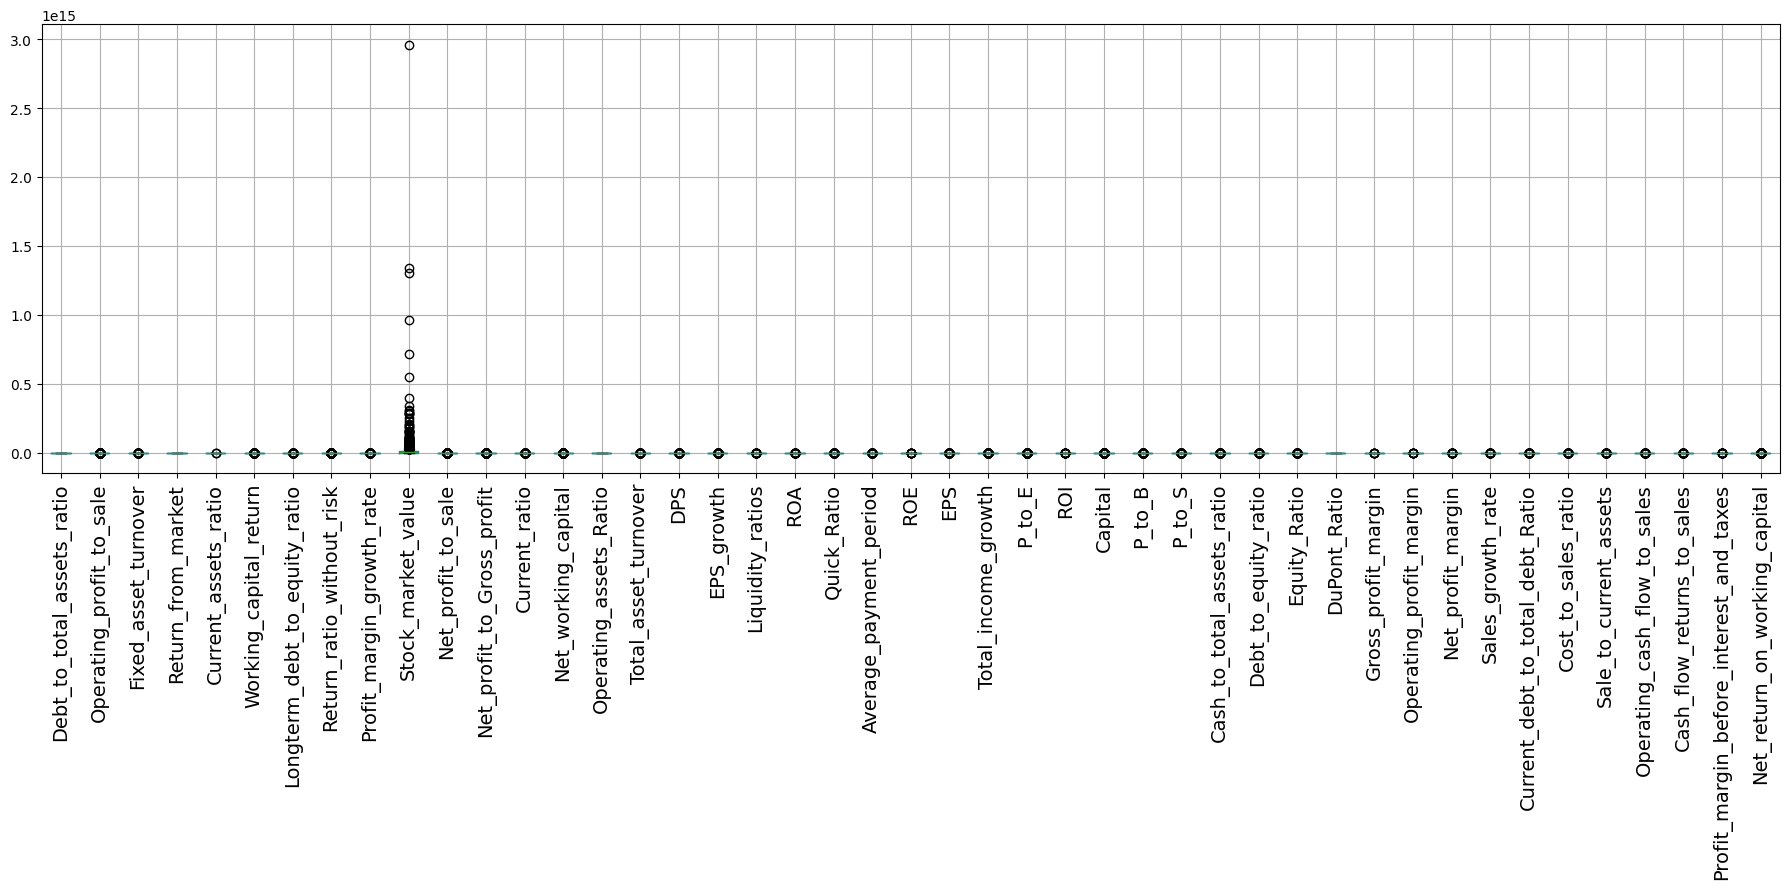

==> BoxPlot S_df_X:


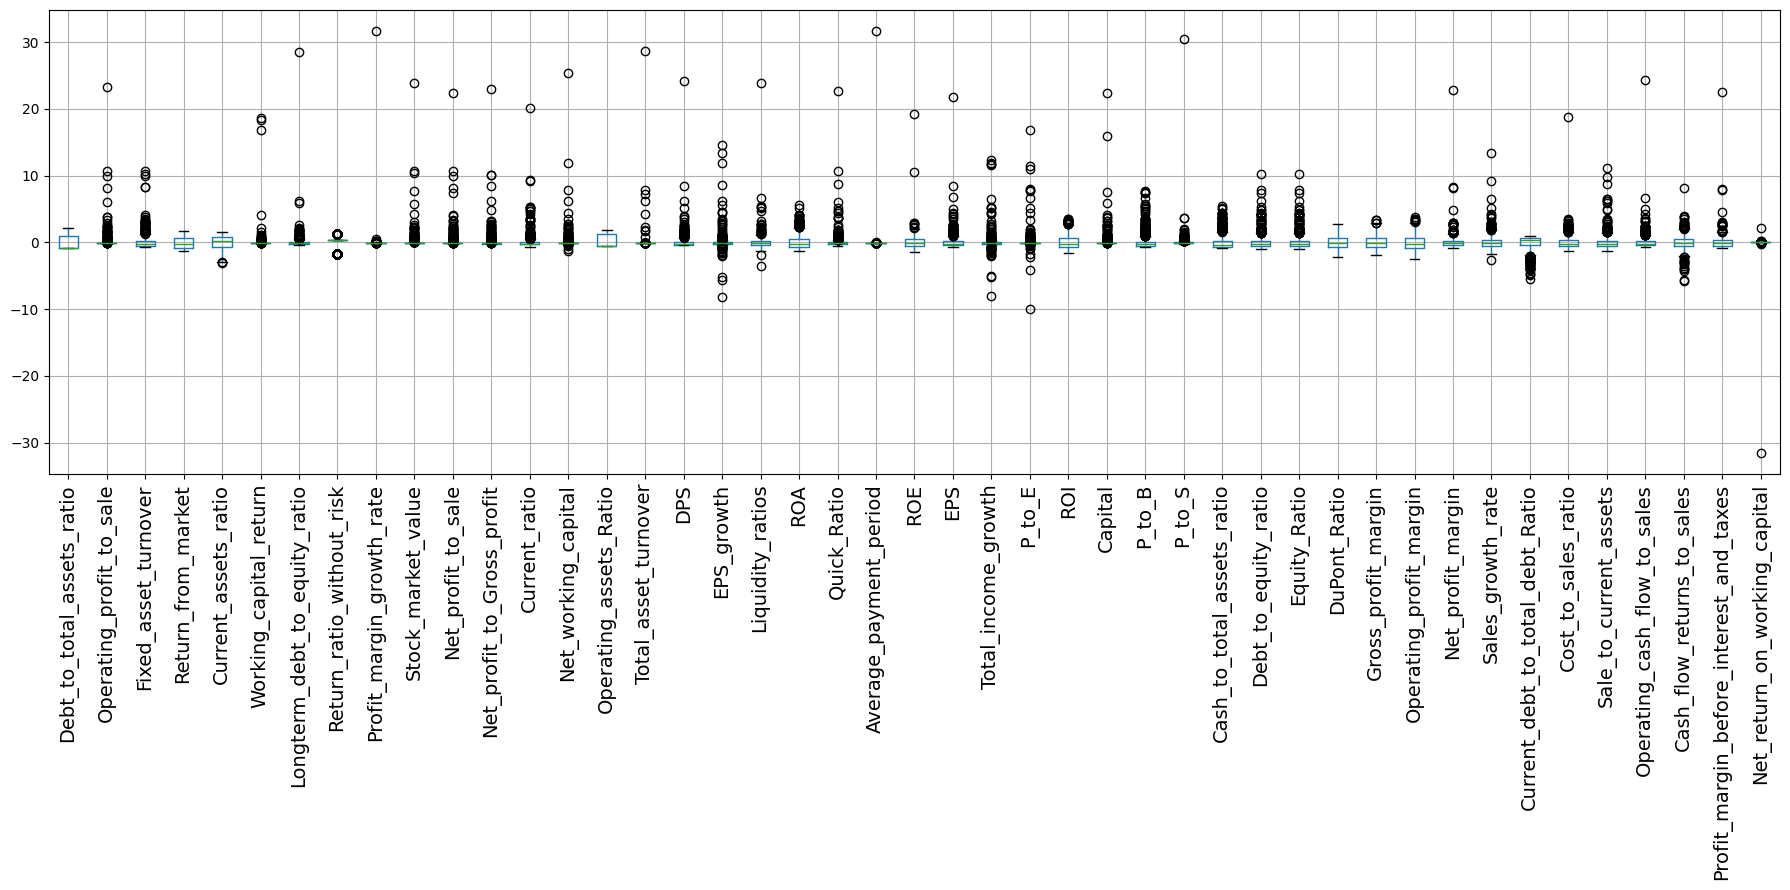

==> BoxPlot SN_df_X:


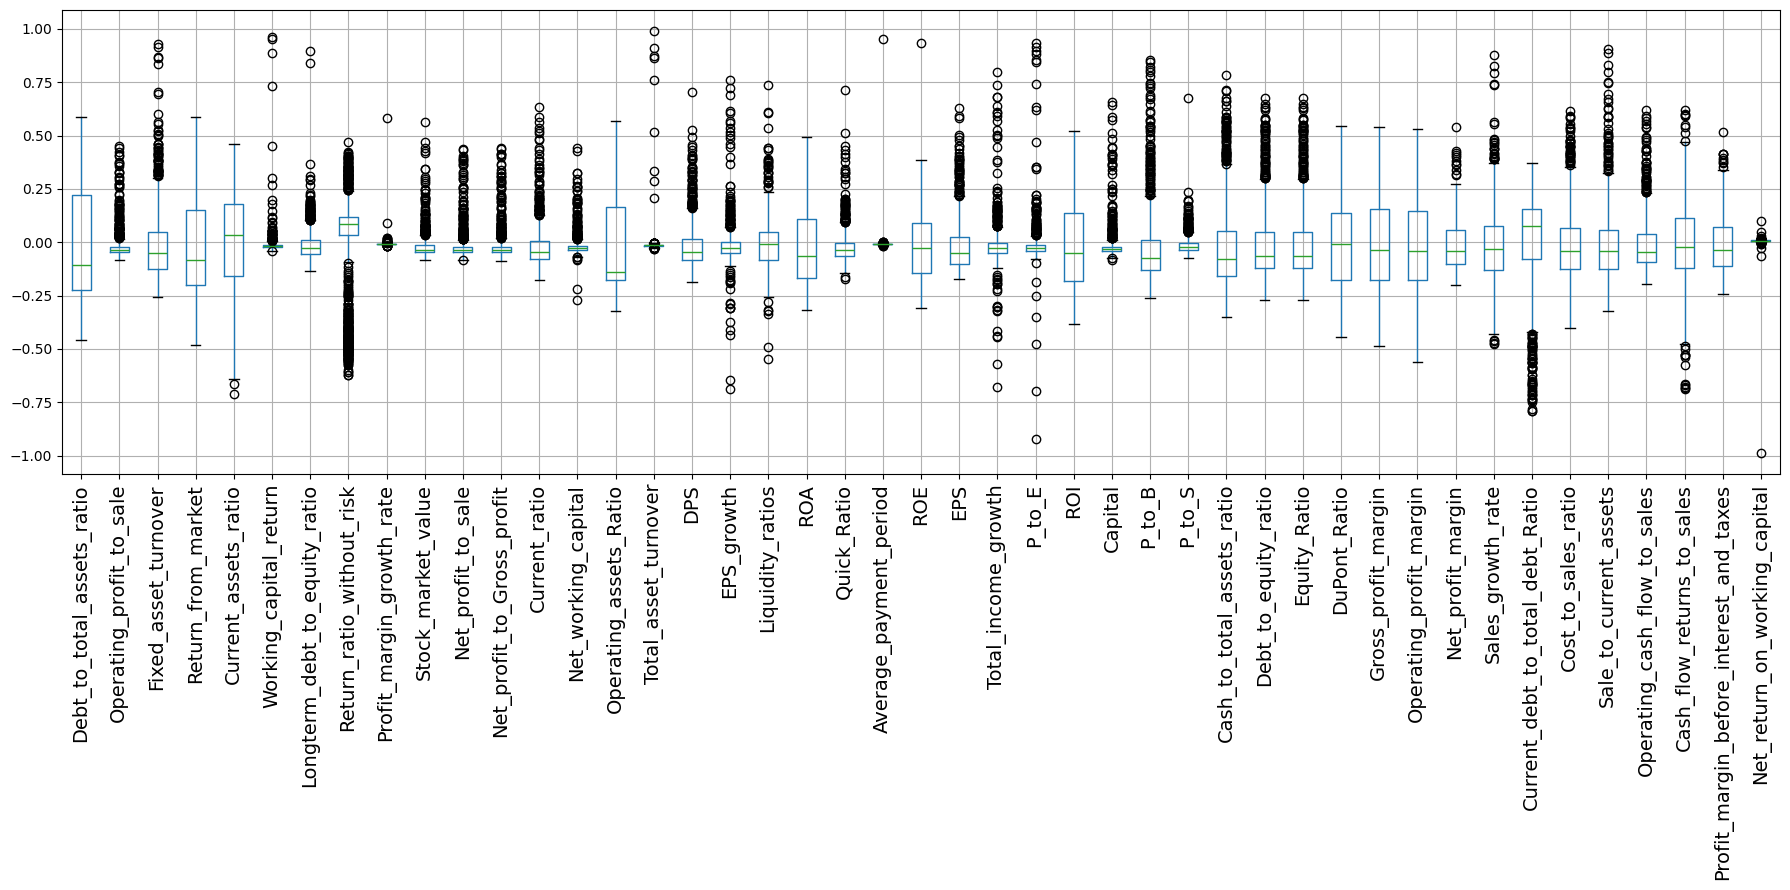

In [5]:
def draw_boxPlot(df, name, tmp_path):
    fig = plt.figure(figsize=(18, 9))
    fig.set_facecolor('white')
    df.boxplot()
    plt.xticks(range(1, df.shape[1]+1), df.columns, fontsize=14, rotation=90)
    plt.tight_layout()
    plt.savefig(f"{tmp_path}/{name}.png")
    plt.close()
    disp(f"BoxPlot {name}", fig)

BoxPlots_path = f"{result_path}/BoxPlots"
if not os.path.exists(BoxPlots_path):
    os.makedirs(BoxPlots_path)

### Original Data box-plot
draw_boxPlot(df_X, "df_X", BoxPlots_path)

### Standard scaled Data box-plot
draw_boxPlot(S_df_X, "S_df_X", BoxPlots_path)

### SN scaled Data box-plot
draw_boxPlot(SN_df_X, "SN_df_X", BoxPlots_path)

In [6]:
def draw_plot(df, col, i, tmp_path):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 9))
    fig.set_facecolor('white')
    
    ax1.plot(df[col])
    ax1.set_title('Line Plot')

    ax2.boxplot(df[col])
    ax2.set_title('Box Plot')
    
    plt.tight_layout()
    plt.savefig(f"{tmp_path}/{i}_{col}.png")
    plt.close()


ColumnsPlots_path = f"{result_path}/ColumnsPlots"
if not os.path.exists(ColumnsPlots_path):
    os.makedirs(ColumnsPlots_path)

df_X_CP_path = f"{ColumnsPlots_path}/df_X"
if not os.path.exists(df_X_CP_path):
    os.makedirs(df_X_CP_path)

S_df_X_CP_path = f"{ColumnsPlots_path}/S_df_X"
if not os.path.exists(S_df_X_CP_path):
    os.makedirs(S_df_X_CP_path)

SN_df_X_CP_path = f"{ColumnsPlots_path}/SN_df_X"
if not os.path.exists(SN_df_X_CP_path):
    os.makedirs(SN_df_X_CP_path)


# for i, col in enumerate(df_X.columns):
    
#     ### Original Columns plot
#     draw_plot(df_X, col, i, df_X_CP_path)

#     ### Standard Columns plot
#     draw_plot(S_df_X, col, i, S_df_X_CP_path)

#     ### SN Columns plot
#     draw_plot(SN_df_X, col, i, SN_df_X_CP_path)

In [7]:
def draw_innerPlot(df, tmp_innerPath):
    comapnies = pd.unique(df["CompanyId"])
    
    for i, col in enumerate(df_X.columns):
        
        tmp_resultPath = f"{tmp_innerPath}/{i}_{col}"
        if not os.path.exists(tmp_resultPath):
            os.makedirs(tmp_resultPath)

        for key in n_dataPoint.keys():
            tmp_comapny_df = pd.DataFrame()
            for company in comapnies:
                tmp_df = df[df["CompanyId"] == company]
                if len(tmp_df) == key:
                    tmp_comapny_df = pd.concat([tmp_comapny_df, tmp_df[["CompanyId", "PersianYear", col]]])

            fig, (box_plot, line_plot) = plt.subplots(2, 1, figsize=(12, 10))
            fig.set_facecolor('white')
            
            boxplot = tmp_comapny_df.boxplot(column=col, by='CompanyId', ax=box_plot)

            box_plot.set_xticklabels([x for x in set(tmp_comapny_df["CompanyId"])], rotation=90)

            box_plot.set_xlabel('Company Id')
            box_plot.set_ylabel(col)
            box_plot.set_title('')

            if key == 1:
                for company_id, group in tmp_comapny_df.groupby('CompanyId'):
                    line_plot.scatter(group["PersianYear"], group[col], label=f'CompanyId {company_id}')
            else:
                # Line plot for each company
                for company_id, group in tmp_comapny_df.groupby('CompanyId'):
                    line_plot.plot(group["PersianYear"], group[col], marker='o', linestyle='-', label=f'CompanyId {company_id}')

            line_plot.set_xticks([i for i in range(1390, 1400)])
            line_plot.set_xticklabels([f"{i}\n({621+i})" for i in range(1390, 1400)])

            line_plot.set_xlabel('Persian Year\n(Gregorian Year)')
            line_plot.set_ylabel(col)
            fig.suptitle('')
            
            # Adjust layout
            plt.tight_layout()
            plt.savefig(f"{tmp_resultPath}/compaines_with_{key}_data_point.png")
            plt.close()



### Original Columns plot   
draw_innerPlot(df, df_X_CP_path)

# ### Standard Columns plot
# draw_innerPlot(S_df, S_df_X_CP_path, col)

# ### SN Columns plot
# draw_innerPlot(SN_df, SN_df_X_CP_path, col)
    

NameError: name 'n_dataPoint' is not defined

<Axes: >

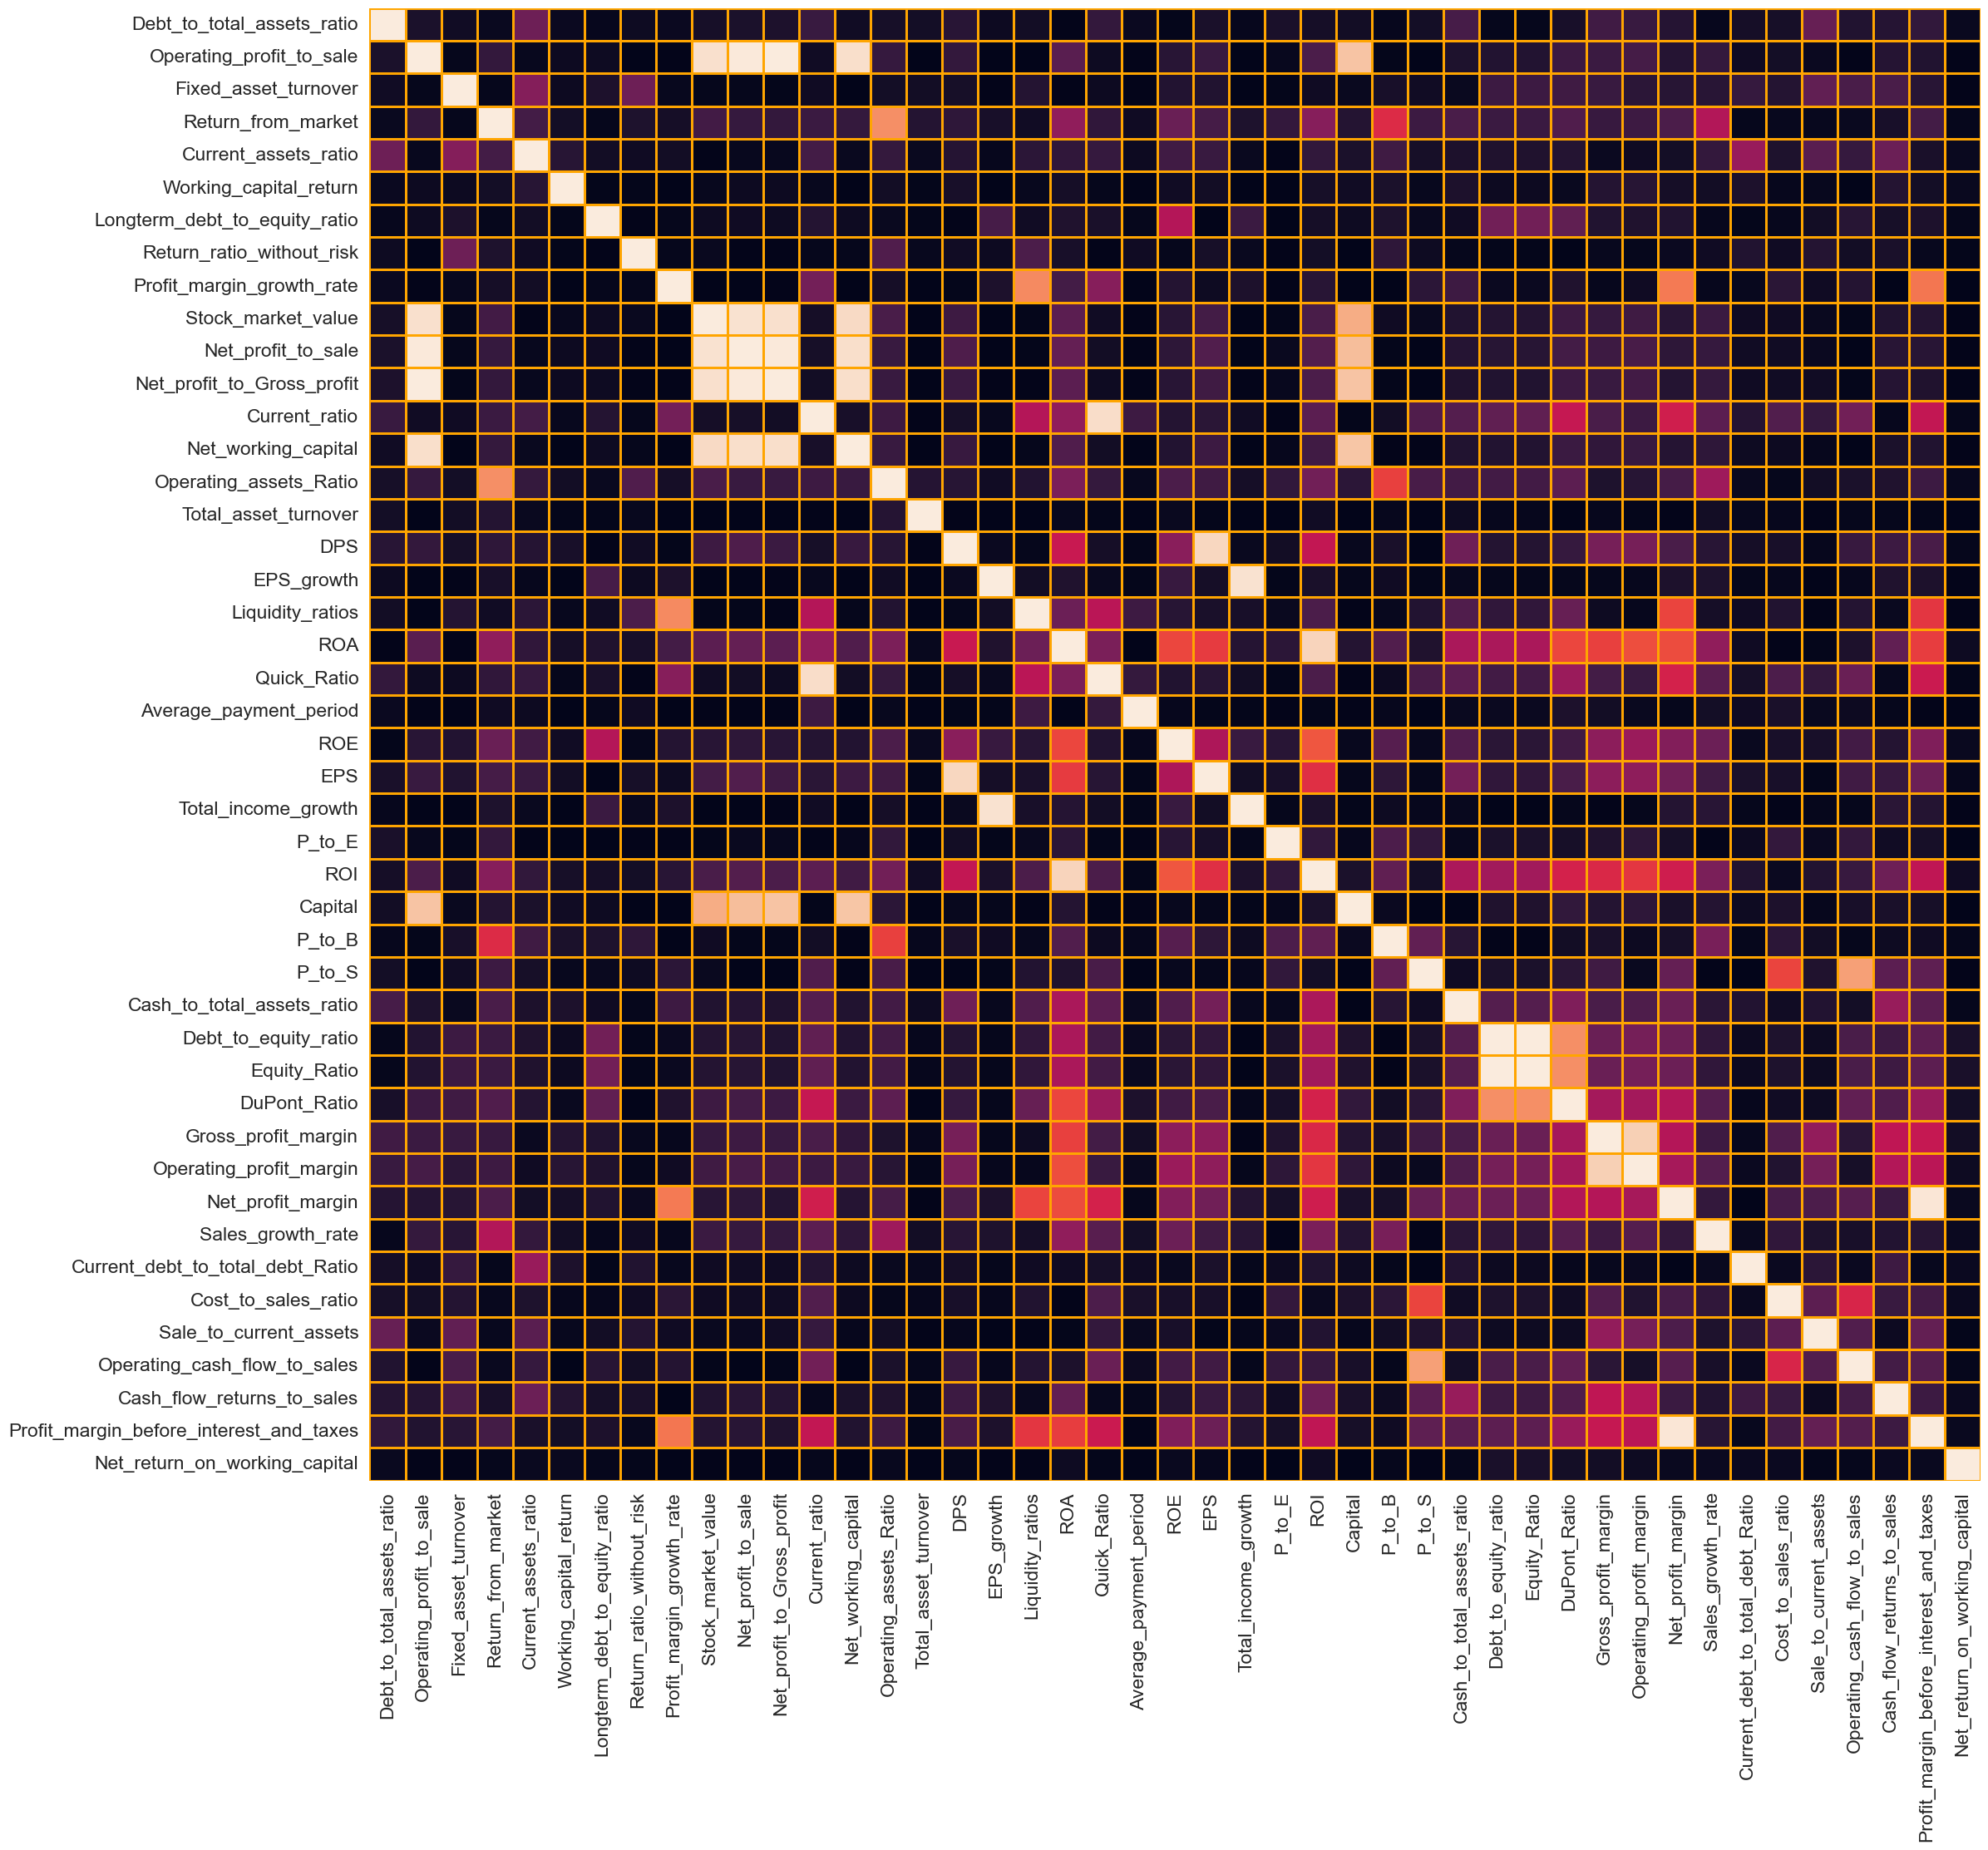

In [ ]:
import seaborn as sns
sns.set_theme(font_scale=1.5)
fig, ax = plt.subplots(figsize=(25, 23))
sns.heatmap(np.abs(df_X.corr()), ax=ax, linewidths=1, cbar=False, linecolor='orange')

In [8]:
import seaborn as sns
sns.set_theme(font_scale=3)

def draw_corrPlot(df, name, tmp_path):
    fig, ax = plt.subplots(figsize=(25, 23))
    fig.set_facecolor('white')
    corr_df = pd.DataFrame(df.corr())
    corr_df.to_csv(f"{tmp_path}/{name}.csv")
    
    sns.heatmap(corr_df.iloc[20:38, 20:38], linewidths=1, ax=ax, cbar=False, linecolor='orange')
    plt.savefig(f"{tmp_path}/{name}.svg", bbox_inches='tight')
    plt.close()
  
CorrelationPlots_path = f"{result_path}/CorrelationPlots"
if not os.path.exists(CorrelationPlots_path):
    os.makedirs(CorrelationPlots_path)

### Original corr-plot
draw_corrPlot(df_X, "df_X", CorrelationPlots_path)

### Standard corr-plot
draw_corrPlot(S_df_X, "S_df_X", CorrelationPlots_path)

### SN corr-plot
draw_corrPlot(SN_df_X, "SN_df_X", CorrelationPlots_path)

In [21]:
df_X.corr().iloc[20:40, 20:40]

,Quick_Ratio,Average_payment_period,ROE,EPS,Total_income_growth,P_to_E,ROI,Capital,P_to_B,P_to_S,Cash_to_total_assets_ratio,Debt_to_equity_ratio,Equity_Ratio,DuPont_Ratio,Gross_profit_margin,Operating_profit_margin,Net_profit_margin,Sales_growth_rate,Current_debt_to_total_debt_Ratio,Cost_to_sales_ratio
Quick_Ratio,1.000000,0.139193,0.089254,0.104765,0.049124,-0.007964,0.196414,0.004942,0.031448,0.188953,0.238033,-0.174946,-0.174937,0.384413,0.177966,0.148510,0.526424,0.227873,-0.059957,0.199844
Average_payment_period,0.139193,1.000000,-0.018533,-0.011484,-0.008558,-0.004442,-0.009246,-0.004877,-0.017096,-0.001313,-0.026388,-0.028272,-0.028270,0.076392,0.047727,0.024263,0.013492,-0.054689,-0.039863,0.066595
ROE,0.089254,-0.018533,1.000000,0.427780,0.148510,-0.107197,0.646538,0.021564,0.223618,0.021004,0.210010,-0.109883,-0.109886,0.169269,0.353374,0.383879,0.328878,0.274624,0.024258,-0.064841
EPS,0.104765,-0.011484,0.427780,1.000000,0.050147,-0.063042,0.564161,-0.014259,0.119795,0.014054,0.294066,-0.128681,-0.128679,0.192625,0.354274,0.357001,0.285758,0.166317,0.070683,0.064502
Total_income_growth,0.049124,-0.008558,0.148510,0.050147,1.000000,-0.013096,0.078124,-0.011651,0.037268,0.016588,0.022074,-0.002272,-0.002267,0.014358,-0.004832,-0.013622,0.096769,0.105781,-0.015083,-0.007380
P_to_E,-0.007964,-0.004442,-0.107197,-0.063042,-0.013096,1.000000,-0.129885,-0.016027,0.201230,0.132305,-0.022775,0.074196,0.074200,-0.060253,-0.085502,-0.121091,-0.061278,0.006971,-0.031625,0.133718
ROI,0.196414,-0.009246,0.646538,0.564161,0.078124,-0.129885,1.000000,0.072246,0.249789,0.054610,0.422120,-0.401921,-0.401919,0.526464,0.545943,0.579920,0.509191,0.309654,0.088615,-0.031058
Capital,0.004942,-0.004877,0.021564,-0.014259,-0.011651,-0.016027,0.072246,1.000000,-0.029860,0.000979,0.000398,-0.082633,-0.082628,0.129959,0.095542,0.124226,0.068340,0.097178,0.036296,-0.074672
P_to_B,0.031448,-0.017096,0.223618,0.119795,0.037268,0.201230,0.249789,-0.029860,1.000000,0.252815,0.105109,-0.007802,-0.007790,0.046998,0.069440,0.034678,0.059073,0.307371,0.012474,0.116459
P_to_S,0.188953,-0.001313,0.021004,0.014054,0.016588,0.132305,0.054610,0.000979,0.252815,1.000000,0.039994,-0.070939,-0.070934,0.110255,0.167798,-0.024356,0.258151,0.006571,0.003724,0.612257


In [22]:
def draw_corrPlot(df, name, tmp_path):
    fig, ax = plt.subplots(figsize=(25, 23))
    fig.set_facecolor('white')
    cax = ax.matshow(df.corr())
    cb = fig.colorbar(cax)
    cb.ax.tick_params(labelsize=16)
    plt.xticks(range(df.shape[1]), df.columns, fontsize=16, rotation=90)
    plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=16)
    plt.savefig(f"{tmp_path}/{name}.svg", bbox_inches='tight')
    plt.close()
  
CorrelationPlots_path = f"{result_path}/CorrelationPlots"
if not os.path.exists(CorrelationPlots_path):
    os.makedirs(CorrelationPlots_path)

### Original corr-plot
draw_corrPlot(df_X, "df_X", CorrelationPlots_path)

### Standard corr-plot
draw_corrPlot(S_df_X, "S_df_X", CorrelationPlots_path)

### SN corr-plot
draw_corrPlot(SN_df_X, "SN_df_X", CorrelationPlots_path)

In [8]:
### Finding min-corr for Orginal Data
c ={}
temp = df_X.corr()
for column in temp:
    c[column]=0
    for val in temp[column]:
        if 0 < abs(val) < 0.1:
            c[column] +=1

i = 1
for k, v in c.items():
    if v > 23:
        print(f'{i} {k} : {v}')
        i += 1

1 Debt_to_total_assets_ratio : 34
2 Operating_profit_to_sale : 27
3 Fixed_asset_turnover : 30
4 Current_assets_ratio : 26
5 Working_capital_return : 42
6 Longterm_debt_to_equity_ratio : 37
7 Return_ratio_without_risk : 40
8 Profit_margin_growth_rate : 34
9 Stock_market_value : 27
10 Net_profit_to_Gross_profit : 28
11 Net_working_capital : 29
12 Total_asset_turnover : 44
13 EPS_growth : 41
14 Liquidity_ratios : 29
15 Average_payment_period : 41
16 Total_income_growth : 38
17 P_to_E : 34
18 Capital : 36
19 P_to_B : 31
20 P_to_S : 30
21 Current_debt_to_total_debt_Ratio : 40
22 Cost_to_sales_ratio : 31
23 Sale_to_current_assets : 32
24 Operating_cash_flow_to_sales : 24
25 Net_return_on_working_capital : 44


In [9]:
### Finding min-corr for Standard Data
c ={}
temp = S_df_X.corr()
for column in temp:
    c[column]=0
    for val in temp[column]:
        if 0 < abs(val) < 0.1:
            c[column] +=1

i = 1
for k, v in c.items():
    if v > 23:
        print(f'{i} {k} : {v}')
        i += 1

1 Debt_to_total_assets_ratio : 34
2 Operating_profit_to_sale : 27
3 Fixed_asset_turnover : 30
4 Current_assets_ratio : 26
5 Working_capital_return : 42
6 Longterm_debt_to_equity_ratio : 37
7 Return_ratio_without_risk : 40
8 Profit_margin_growth_rate : 34
9 Stock_market_value : 27
10 Net_profit_to_Gross_profit : 28
11 Net_working_capital : 29
12 Total_asset_turnover : 44
13 EPS_growth : 41
14 Liquidity_ratios : 29
15 Average_payment_period : 41
16 Total_income_growth : 38
17 P_to_E : 34
18 Capital : 36
19 P_to_B : 31
20 P_to_S : 30
21 Current_debt_to_total_debt_Ratio : 40
22 Cost_to_sales_ratio : 31
23 Sale_to_current_assets : 32
24 Operating_cash_flow_to_sales : 24
25 Net_return_on_working_capital : 44


In [10]:
### Finding min-corr for SN Data
c ={}
temp = SN_df_X.corr()
for column in temp:
    c[column]=0
    for val in temp[column]:
        if 0 < abs(val) < 0.1:
            c[column] +=1

i = 1
for k, v in c.items():
    if v > 23:
        print(f'{i} {k} : {v}')
        i += 1

1 Debt_to_total_assets_ratio : 29
2 Fixed_asset_turnover : 28
3 Working_capital_return : 39
4 Longterm_debt_to_equity_ratio : 30
5 Return_ratio_without_risk : 41
6 Profit_margin_growth_rate : 36
7 Total_asset_turnover : 42
8 EPS_growth : 31
9 Liquidity_ratios : 32
10 Average_payment_period : 44
11 Total_income_growth : 31
12 P_to_E : 38
13 Capital : 28
14 Current_debt_to_total_debt_Ratio : 38
15 Cost_to_sales_ratio : 36
16 Sale_to_current_assets : 27
17 Net_return_on_working_capital : 44


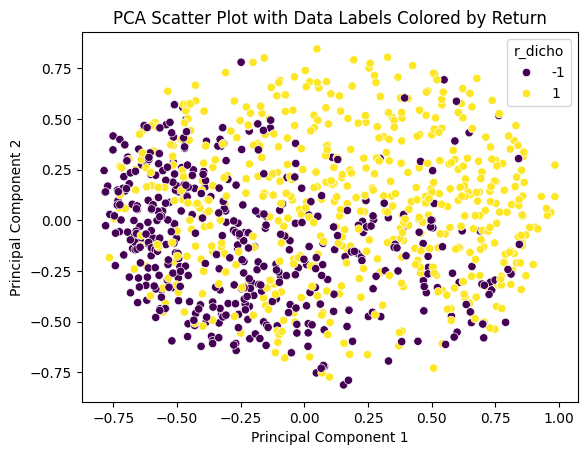

In [21]:
import seaborn as sns
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensionality
pca = PCA()
pca_result = pca.fit_transform(SN_df_X)

# Create a DataFrame with the principal components and the target variable
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i+1}' for i in range(pca_result.shape[1])])
pca_df['r_dicho'] = df['r_dicho']

# Scatter plot with color-coded data labels
sns.scatterplot(x='PC1', y='PC2', hue='r_dicho', data=pca_df, palette='viridis')

plt.title('PCA Scatter Plot with Data Labels Colored by Return')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# plt.scatter(SN_df_X["P_to_E"], SN_df_X["Quick_Ratio"])